### Things to do

- ?
    - Official adaptation rate method
    - Hemisphere
    - Bin length is +.1 or *.1
- Analyze blocked and shuffled data in NCM and Field L
    - Check if there is a difference between NCM and Field L
    - Determine if there is a loss of decoding accuracy accross stimulus repetition
    - Hemispheric differences?
    - Analyze single unit data in a similar fashion
    - Figure out why part of shuffled data appears to be corrupted
   
- Analyze contrast data
    - Compare decoding accuracy between first and second half of presentations

In [1]:
import mdlab as mdl
import dnlab as dnl
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as sst
import pandas as pd
import pdb

In [2]:
frcc=mdl.FRCC()
trailing_type = frcc.trailing_type
trailing_param = frcc.get_trailing_param(trailing_type)
stats_test = frcc.stats_test

In [4]:
fn = mdl.get_pathname()

In [ ]:
fn2 = mdl.get_pathname()

In [ ]:
mdl.batch_mat2npz("hv_l_blocked.npz")

In [3]:
fn = mdl.get_pathname()
header, spikes = mdl.load_npz_data(fn, False)
ncm_block = mdl.SpikeData(header, spikes)
ncm_mua_block=ncm_block.mua_or_sua("mua")
ncm_sep_mua_block = dnl.separate_npz_data(ncm_mua_block)
res_ncm_block = dnl.res_filter(ncm_sep_mua_block)

In [5]:
header, spikes = mdl.load_npz_data(fn2, False)
l_block = mdl.SpikeData(header, spikes)
l_mua_block=l_block.mua_or_sua("mua")
l_sep_mua_block = dnl.separate_npz_data(l_mua_block)
res_l_block = dnl.res_filter(ncm_sep_mua_block)

NameError: name 'fn2' is not defined

In [ ]:
ncm_df = dnl.batch_decoding_accuracy(res_ncm_block)

In [ ]:
n =0
for ele in ncm_sep_mua_block[n].electrodes:
    ele_data = ncm_sep_mua_block[n].get_kw_SpikeData(electrode = ele)
    print mdl.birdid2str(ele_data.birdid[0])
    print ele
    if ele in res_ncm_block[n].electrodes:
        print "Responding"
    else:
        print "Not Responding"
    mdl.raster_plot(ele_data.spikes)
    plt.show()

In [ ]:
header, spikes = mdl.load_npz_data('/Users/david/Documents/blocked.npz', False)
block = mdl.SpikeData(header, spikes)
#mua_block=block.mua_or_sua("mua")
sep_mua_block = dnl.separate_npz_data(block)

In [12]:
n =0
for ele in sep_mua_block[n].electrodes:
    ele_data = sep_mua_block[n].get_kw_SpikeData(electrode = ele)
    print mdl.birdid2str(ele_data.birdid[0])
    print ele
    if ele in res_block[n].electrodes:
        print "Responding"
    else:
        print "Not Responding"
    mdl.raster_plot(ele_data.spikes)
    plt.show()

NameError: name 'sep_mua_block' is not defined

In [4]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split as split

In [13]:
def contrast_decoding_accuracy(electrode, k=15, rep_num=250):
    # Generates parameters for acc and trial_usage
    num_stim = len(electrode.stim)
    total_trials = electrode.header.shape[0]
    trials_per_stim = total_trials/num_stim
    acc = np.zeros((num_stim, trials_per_stim))
    longest_stim = dnl.get_longest_stim(electrode)
    #2D array #2D arra`y, stim id x the trials per stimulus, increments up by one every time given trial used as target
    trial_usage = np.zeros((num_stim, trials_per_stim))

    training_data = dnl.Spike_to_Binned(electrode.get_kw_SpikeData(trial = range(1, 161)), custom_stim_length = longest_stim)
    training_bins = training_data.bins
    training_idx = training_data.header.index.values
    training_stim_ids=np.array(training_data.header.stim)
    
    target_data = dnl.Spike_to_Binned(electrode.get_kw_SpikeData(trial = range(161, 321)), custom_stim_length = longest_stim)
    target_bins = target_data.bins
    target_idx = target_data.header.index.values
    target_stim_ids=np.array(target_data.header.stim)
    
    model = knn(n_neighbors=k, metric='euclidean')
    model.fit(training_bins, training_stim_ids)
    pred = model.predict(target_bins)
    pdb.set_trace()




    #Checks to see if predictions are correct
    for j in range(0, pred.shape[0]):
        stim_id= target_stim_ids[j]
        idx = target_idx[j]
        stim_data = electrode.get_kw_SpikeData(stim=stim_id)
        net_trial_num = stim_data.header.loc[idx:idx].trial.max()
        mod_stim_data_header = stim_data.header.reset_index()
        true_trial_num = mod_stim_data_header[(mod_stim_data_header["trial"] == net_trial_num)].index[0]
        #increament trial usageb
        trial_usage[stim_id-1][true_trial_num]+=1
        if pred[j] == stim_id:
            acc[stim_id-1][true_trial_num] += 1
            
    final_acc = np.divide(acc, trial_usage)
    return final_acc 

In [14]:
q = contrast_decoding_accuracy(test)

> <ipython-input-13-5cddf4c084c8>(29)contrast_decoding_accuracy()
-> for j in range(0, pred.shape[0]):


(Pdb)  pred


array([2, 3, 2, 2, 2, 1, 2, 3, 2, 3, 3, 2, 2, 1, 2, 3, 2, 1, 3, 2, 2, 3,
       2, 3, 4, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 3,
       3, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 3, 4, 1, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 3, 4, 3, 2, 2, 2, 2, 4, 2, 2, 2, 1, 1, 1, 2, 2, 3, 4, 2, 2,
       3, 3, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 2, 1, 2, 3, 1, 2,
       4, 2, 2, 3, 2, 2, 3, 4, 3, 3, 3, 3, 2, 1, 2, 1, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2])


(Pdb)  pred.shape


(160L,)


(Pdb)  model


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')


(Pdb)  training_bins


array([[-0.60898352, -0.60898352, -0.60898352, ...,  0.89172587,
         0.89172587, -0.60898352],
       [-0.51097613, -0.51097613, -0.51097613, ...,  1.25189152,
        -0.51097613, -0.51097613],
       [-0.65863846, -0.65863846, -0.65863846, ..., -0.65863846,
        -0.65863846,  0.35127385],
       ...,
       [-0.38729833, -0.38729833, -0.38729833, ..., -0.38729833,
        -0.38729833, -0.38729833],
       [-0.56433265,  1.38261499, -0.56433265, ..., -0.56433265,
        -0.56433265, -0.56433265],
       [-0.48717735,  1.75383847,  1.75383847, ..., -0.48717735,
        -0.48717735, -0.48717735]])


(Pdb)  training_bins.shape


(160L, 69L)


(Pdb)  target_bins


array([[-0.71646768, -0.71646768, -0.71646768, ..., -0.71646768,
         0.43321301, -0.71646768],
       [-0.5891883 , -0.5891883 , -0.5891883 , ..., -0.5891883 ,
        -0.5891883 , -0.5891883 ],
       [-0.71904192, -0.71904192, -0.71904192, ..., -0.71904192,
        -0.71904192, -0.71904192],
       ...,
       [-0.66426897, -0.66426897, -0.66426897, ..., -0.66426897,
        -0.66426897,  1.09859868],
       [-0.57814716, -0.57814716, -0.57814716, ..., -0.57814716,
         3.04841232, -0.57814716],
       [ 1.29856057, -0.60783686, -0.60783686, ...,  1.29856057,
        -0.60783686, -0.60783686]])


(Pdb)  target_bins.shape


(160L, 69L)


(Pdb)  target_stim_ids


array([5, 8, 8, 7, 7, 7, 5, 7, 6, 8, 5, 7, 7, 7, 5, 6, 6, 6, 5, 6, 6, 5,
       6, 7, 5, 7, 6, 7, 6, 5, 8, 6, 8, 8, 8, 5, 8, 7, 5, 6, 6, 5, 6, 8,
       5, 7, 7, 5, 7, 6, 6, 7, 6, 8, 8, 5, 8, 5, 8, 5, 5, 8, 5, 6, 7, 8,
       5, 7, 5, 5, 7, 8, 7, 8, 7, 8, 6, 6, 6, 8, 6, 8, 6, 6, 6, 6, 8, 7,
       7, 7, 6, 5, 5, 6, 7, 6, 5, 8, 8, 7, 8, 8, 5, 8, 7, 8, 8, 8, 6, 8,
       7, 6, 6, 7, 5, 5, 5, 7, 7, 8, 5, 5, 7, 7, 5, 6, 6, 5, 5, 8, 7, 8,
       8, 7, 8, 8, 7, 6, 5, 8, 5, 8, 6, 8, 8, 7, 7, 5, 5, 7, 5, 6, 6, 7,
       7, 6, 6, 6, 5, 5])


(Pdb)  q


BdbQuit: 

In [12]:
q

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 

In [7]:
test = res_ncm_block[0].get_kw_SpikeData(electrode =100)

In [95]:
last = x.get_kw_SpikeData(trial = range(161,321))
first = x.get_kw_SpikeData(trial = range(1,161))

In [97]:
dnl.get_longest_stim(first)

0.59

In [98]:
dnl.get_longest_stim(x)

0.53

In [104]:
for stim in x.stim:
    print stim
    print x.extract_stim_dur(stim)

1
0.511111
2
0.591156
3
0.593968
4
0.589977
5
0.559206
6
0.542404
7
0.500159
8
0.529478


In [76]:
x = z.get_kw_SpikeData(electrode = 300)

In [77]:
contrast_decoding_accuracy(x)

> <ipython-input-75-f24e984f6348>(29)contrast_decoding_accuracy()
-> for j in range(0, pred.shape[0]):


(Pdb)  model


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')


(Pdb)  model.predict(target_bins)


*** ValueError: query data dimension must match training data dimension


(Pdb)  target_bins.shape


(160L, 63L)


(Pdb)  training_bins.shape


(160L, 69L)


(Pdb)  q


BdbQuit: 

In [22]:
y = z.get_kw_SpikeData(stim=1, electrode = 100)

In [88]:
fn = mdl.get_pathname()
header, spikes = mdl.load_npz_data(fn, False)
ncm_block = mdl.SpikeData(header, spikes)
ncm_mua_block=ncm_block.mua_or_sua("mua")
ncm_sep_mua_block = dnl.separate_npz_data(ncm_mua_block)
ncm_contrast = dnl.res_filter(ncm_sep_mua_block)

In [89]:
ncm_c_df = dnl.batch_decoding_accuracy(ncm_contrast)

1 Experiments Analyzed
2 Experiments Analyzed
3 Experiments Analyzed
4 Experiments Analyzed
5 Experiments Analyzed
6 Experiments Analyzed
7 Experiments Analyzed
8 Experiments Analyzed


In [90]:
ncm_c_df.to_csv("contrast_ncm.csv")

In [98]:
fn = mdl.get_pathname()
header, spikes = mdl.load_npz_data(fn, False)
ncm_block = mdl.SpikeData(header, spikes)
ncm_mua_block=ncm_block.mua_or_sua("mua")
ncm_sep_mua_block = dnl.separate_npz_data(ncm_mua_block)
l_contrast = dnl.res_filter(ncm_sep_mua_block)

In [99]:
l_c_df = dnl.batch_decoding_accuracy(l_contrast)
l_c_df.to_csv("contrast_fieldl.csv")

1 Experiments Analyzed
2 Experiments Analyzed
3 Experiments Analyzed
4 Experiments Analyzed
5 Experiments Analyzed


In [105]:
ncmd = ncm_c_df.average_decoding_accuracy
ld = ncm_c_df.average_decoding_accuracy

In [103]:
sst.ttest_ind(l_c_df.average_decoding_accuracy, ncm_c_df.average_decoding_accuracy)

Ttest_indResult(statistic=4.440342299434775, pvalue=1.225611472308379e-05)

In [113]:
region = []
for x in range(0,len(ncmd)):
    region.append("NCM")
ncm_c_df["region"] = region

In [119]:
l_c_df["region"] = "Field L"

In [132]:
#contrast_df = pd.concat(ncm_c_df, l_c_df)
contrast_df = pd.concat([l_c_df, ncm_c_df])

In [10]:
fn =  mdl.get_pathname()
contrast_df = pd.read_csv(fn)

In [28]:
print str(len(contrast_df)) + " total sites"
print str(len(ncm)) + " NCM sites"
print str(len(fieldl)) + " Field L sites"

333 total sites
204 NCM sites
129 Field L sites


In [16]:
contrast_df = pd.read_csv("contrast_df.csv")
ncm = contrast_df[(contrast_df["region"] == "NCM")]
fieldl = contrast_df[(contrast_df["region"] == "Field L")]

P Value = 1.225611472308379e-05


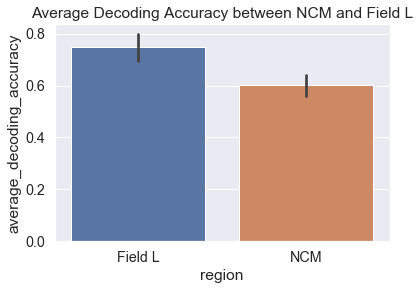

In [29]:
sns.set(font_scale = 1.3)
sns.barplot(x="region", y='average_decoding_accuracy', data=contrast_df)
stat,pval = sst.ttest_ind(ncm.average_decoding_accuracy , fieldl.average_decoding_accuracy)
plt.title("Average Decoding Accuracy between NCM and Field L")
print "P Value = "+str(pval)
plt.show()


P Value = 5.495304411644999e-08


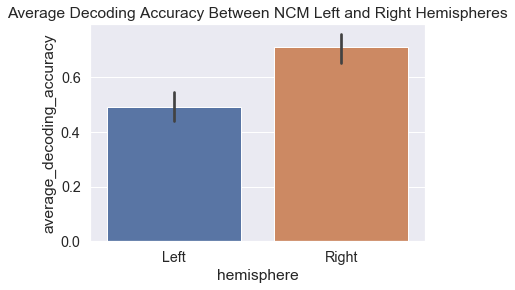

In [35]:
sns.set(font_scale = 1.3)
sns.barplot(x="hemisphere", y='average_decoding_accuracy', data=ncm)
stat,pval = sst.ttest_ind(ncm[(ncm["hemisphere"] == "Right")].average_decoding_accuracy , ncm[(ncm["hemisphere"] == "Left")].average_decoding_accuracy)
plt.title("Average Decoding Accuracy Between NCM Left and Right Hemispheres")
print "P Value = "+str(pval)

P Value = 0.012675381675286684


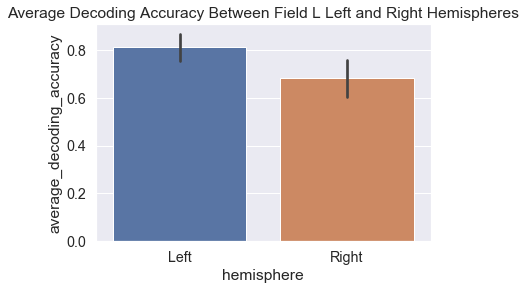

In [34]:
sns.set(font_scale = 1.3)
sns.barplot(x="hemisphere", y='average_decoding_accuracy', data= fieldl)
stat,pval = sst.ttest_ind(fieldl[(fieldl["hemisphere"] == "Right")].average_decoding_accuracy , fieldl[(fieldl["hemisphere"] == "Left")].average_decoding_accuracy)
print "P Value = "+str(pval)
plt.title("Average Decoding Accuracy Between Field L Left and Right Hemispheres")
plt.show()

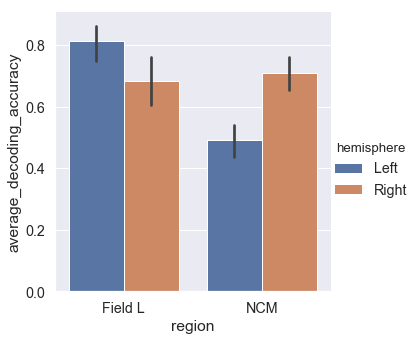

In [32]:
sns.set(font_scale = 1.3)
sns.catplot(x='region', y='average_decoding_accuracy', hue='hemisphere', data=contrast_df, kind='bar')
plt.show()

In [ ]:
da_list = []
for da in ncm.decoding_accuracy.values:
    print np.mean(da)
    #da_list.append(np.mean(da, axis =0))

In [64]:
for n in np.asarray(ncm.index):
    row = ncm.loc[n]
    da = np.asarray(row.decoding_accuracy)
    print np.meanda
    break

[[0.00787402 0.048      0.         0.         0.10833333 0.15037594
  0.         0.03053435 0.05755396 0.         0.01680672 0.01769912
  0.         0.03968254 0.05785124 0.05       0.57264957 0.28787879
  0.032      0.         0.02542373 0.00813008 0.         0.
  0.06722689 0.08695652 0.36153846 0.4214876  0.15625    0.05223881
  0.14782609 0.03225806 0.01449275 0.06557377 0.10769231 0.21538462
  0.         0.         0.02419355 0.32038835]
 [0.98561151 0.99122807 0.98449612 0.98058252 0.99173554 0.95275591
  0.9921875  0.96774194 0.99173554 0.99166667 0.992      0.99224806
  0.96825397 0.93442623 0.99275362 0.99159664 0.99056604 0.99259259
  0.96396396 0.99137931 0.875      0.98550725 0.76923077 0.
  0.99270073 0.96825397 0.97744361 0.98198198 0.99230769 0.99173554
  0.96521739 0.89430894 0.99259259 0.97692308 0.31914894 0.94573643
  0.96153846 0.75409836 0.64705882 0.79527559]
 [0.         0.         0.52       0.         0.42975207 0.
  0.53174603 0.         0.12195122 0.328125   

In [60]:
c = ["birdid", "electrode", "region", "hemisphere", "average_adaptation_rate", "average_decoding_accuracy", "trial_decoding_accuracy"]
ncm2 = pd.DataFrame(columns = c)
for n in np.asarray(ncm.index):
    row = ncm.loc[n]
    to_add = [row.birdid, row.electrode, row.region, row.hemisphere, row.average_adaptation_rate, row.average_decoding_accuracy, np.mean(row.decoding_accuracy, axis=0)]
    ncm2 = ncm2.append(pd.DataFrame([to_add], columns=c))
    ncm2.reset_index(drop=True)

IndexError: tuple index out of range

In [158]:
trial_decoding_acc = []
for x in range(0, len(contrast_df)):
    trial_decoding_acc.append(np.mean(contrast_df.iloc[x].decoding_accuracy, axis=0))
contrast_df["trial_decoding_acc"] = trial_decoding_acc

In [160]:
contrast_df.to_csv("contrast_df.csv")